In [2]:
using Pkg
Pkg.activate("..")

  Activating project at `~/repos/ProactiveHRI.jl`


In [ ]:
# Pkg.instantiate()
# Pkg.update()

In [37]:
include("dynamics.jl")
include("planner.jl")
include("planner_utils.jl")
include("utils.jl")
include("plotting.jl")
include("mpc.jl")
include("sim.jl")
include("experiments.jl")

display_data (generic function with 1 method)

### Interaction planner

In [3]:
dt = 0.1
velocity_max = 3.0
# human = SingleIntegratorPolar2D(dt, velocity_max, [pi, 2.])
human = Unicycle(dt, velocity_max, [1., 3.])

time_horizon = 25
# Q = zeros(Float64, human.state_dim, human.state_dim)
# R = diagm([0.; 0.1]) 
# Qt = diagm([10.; 10.])
Q = diagm([0.0; 0.0; 0.])
R = diagm([1.0; 0.1]) 
Qt = diagm([10.; 10.; 0.])
markup = 1.05
collision_slack = 150.
trust_region_weight = 5.
inconvenience_weights = [1.; 1.; 0.01]
collision_radius = 1.
inconvenience_ratio = 0.2


human_hps = PlannerHyperparameters(dynamics=human,
                             time_horizon=time_horizon,
                             Q=Q,
                             R=R,
                             Qt=Qt,
                             markup=markup,
                             collision_slack=collision_slack,
                             trust_region_weight=trust_region_weight,
                             inconvenience_weights=inconvenience_weights,
                             collision_radius=collision_radius,
                             inconvenience_ratio=inconvenience_ratio)



dt = 0.1
velocity_max = 3.0
# robot = Unicycle(dt, velocity_max, [1.0, 2.])
robot = DynamicallyExtendedUnicycle(dt, velocity_max, [1., 3.])

# time_horizon = 45
Q = diagm([0.0; 0.0; 0.; 0.])
R = diagm([1.; 1.]) 
Qt = diagm([10.; 10.; 0.; 0.])

robot_hps = PlannerHyperparameters(dynamics=robot,
                             time_horizon=time_horizon,
                             Q=Q,
                             R=R,
                             Qt=Qt,
                             markup=markup,
                             collision_slack=collision_slack,
                             trust_region_weight=trust_region_weight,
                             inconvenience_weights=inconvenience_weights,
                             collision_radius=collision_radius,
                             inconvenience_ratio=inconvenience_ratio)


PlannerHyperparameters{Float64}
  dynamics: DynamicallyExtendedUnicycle{Float64}
  time_horizon: Int64 25
  Q: Array{Float64}((4, 4)) [0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0]
  R: Array{Float64}((2, 2)) [1.0 0.0; 0.0 1.0]
  Qt: Array{Float64}((4, 4)) [10.0 0.0 0.0 0.0; 0.0 10.0 0.0 0.0; 0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0]
  markup: Float64 1.05
  collision_slack: Float64 150.0
  collision_markup: Float64 0.98
  trust_region_weight: Float64 5.0
  inconvenience_weights: Array{Float64}((3,)) [1.0, 1.0, 0.01]
  collision_radius: Float64 1.0
  inconvenience_ratio: Float64 0.2


In [4]:
robot_initial_state = [5.; 5.; -pi / 2.; 0.]
robot_goal_state = [5.; -5.; -pi / 2; 0.]
human_initial_state = [5.; -5.; pi / 2]
human_goal_state = [5.; 5.; pi / 2]
solver = "ECOS"

ip = InteractionPlanner(robot_hps, 
                        human_hps,
                        robot_initial_state,
                        human_initial_state,
                        robot_goal_state,
                        human_goal_state,
                        solver)
# 
# ip = InteractionPlanner(human_hps, 
#                         robot_hps,
#                         human_initial_state,
#                         robot_initial_state,
#                         human_goal_state,
#                         robot_goal_state,
#                         solver)

InteractionPlanner
  ego_planner: AgentPlanner
  other_planner: AgentPlanner


In [5]:
# Adds a wall constraint to the planner
wall_1 = Wall("x", 0., 6.1, "less")
wall_constraint(ip, wall_1, "wall_1")
wall_2 = Wall("x", 0.1, 3.2, "greater")
wall_constraint(ip, wall_2, "wall_2")

26-element Vector{ConstraintRef{Model, MathOptInterface.ConstraintIndex{MathOptInterface.ScalarAffineFunction{Float64}, MathOptInterface.GreaterThan{Float64}}, ScalarShape}}:
 x[1,1] - 0.1 x[1,2] ≥ 4.2
 x[2,1] - 0.1 x[2,2] ≥ 4.2
 x[3,1] - 0.1 x[3,2] ≥ 4.2
 x[4,1] - 0.1 x[4,2] ≥ 4.2
 x[5,1] - 0.1 x[5,2] ≥ 4.2
 x[6,1] - 0.1 x[6,2] ≥ 4.2
 x[7,1] - 0.1 x[7,2] ≥ 4.2
 x[8,1] - 0.1 x[8,2] ≥ 4.2
 x[9,1] - 0.1 x[9,2] ≥ 4.2
 x[10,1] - 0.1 x[10,2] ≥ 4.2
 ⋮
 x[18,1] - 0.1 x[18,2] ≥ 4.2
 x[19,1] - 0.1 x[19,2] ≥ 4.2
 x[20,1] - 0.1 x[20,2] ≥ 4.2
 x[21,1] - 0.1 x[21,2] ≥ 4.2
 x[22,1] - 0.1 x[22,2] ≥ 4.2
 x[23,1] - 0.1 x[23,2] ≥ 4.2
 x[24,1] - 0.1 x[24,2] ≥ 4.2
 x[25,1] - 0.1 x[25,2] ≥ 4.2
 x[26,1] - 0.1 x[26,2] ≥ 4.2

In [8]:
incon_problem, xs, us = @time solve(ip.ego_planner.incon, iterations=10, verbose=false, keep_history=false)
incon_problem, xs, us = @time solve(ip.other_planner.incon, iterations=10, verbose=false, keep_history=false);



  0.128696 seconds (449.94 k allocations: 43.689 MiB, 17.52% gc time)


  0.092632 seconds (418.29 k allocations: 38.622 MiB, 9.45% gc time)


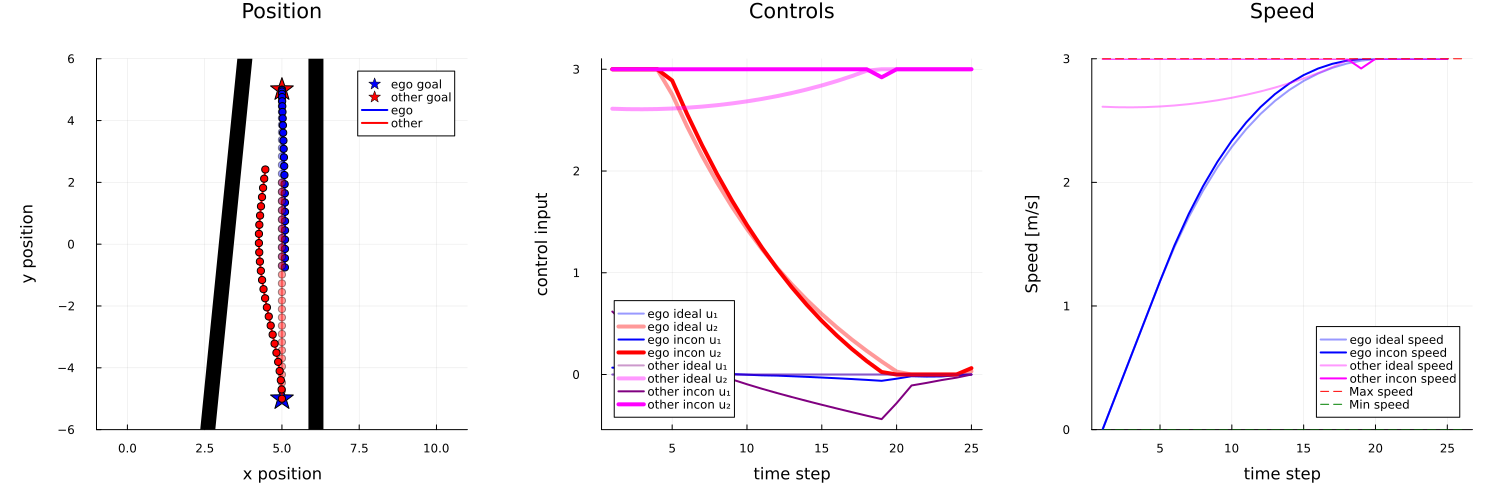

In [10]:
plot_solve_solution(ip, walls=[wall_1, wall_2], pos_xlims=[-1, 11], pos_ylims=[-6, 6])

# Iterated Best Response

In [ ]:
@time ibr(ip, 3, "ego")

In [ ]:
plot_solve_solution(ip, pos_xlims=[-1, 11], walls=nothing, pos_ylims=[-6, 6])

# Animation

In [ ]:
animation(ip, pos_xlims=[-1, 11], pos_ylims=[-4, 4])

In [ ]:
avoidance_animation(ip, pos_xlims=[0, 10], pos_ylims=[-5, 5])

# MPC Controller Simulation
*At the moment it is a known issue that the sim breaks if the dynamics classes used are different between the different InteractionPlanner models, will be fixed

In [176]:
include("sim.jl")
include("mpc.jl")

mpc_step (generic function with 2 methods)

In [245]:
solver = "ECOS"

time_horizon = 25
dt = 0.1
velocity_max = 1.5

human = DynamicallyExtendedUnicycle(dt, velocity_max, [1., 1.5])

Q = diagm([0.0; 0.0; 0.; 0.])
R = diagm([1.; 1.]) 
Qt = diagm([10.; 10.; 0.; 0.])
markup = 1.05
collision_slack = 150.
trust_region_weight = 0.
inconvenience_weights = [1.; 1.; 0.1]
collision_radius = 1.
inconvenience_ratio = 0.01

human_hps = PlannerHyperparameters(dynamics=human,
                             time_horizon=time_horizon,
                             Q=Q,
                             R=R,
                             Qt=Qt,
                             markup=markup,
                             collision_slack=collision_slack,
                             trust_region_weight=trust_region_weight,
                             inconvenience_weights=inconvenience_weights,
                             collision_radius=collision_radius,
                             inconvenience_ratio=inconvenience_ratio)



dt = 0.1
velocity_max = 1.5

robot = DynamicallyExtendedUnicycle(dt, velocity_max, [1., 1.5])

Q = diagm([0.0; 0.0; 0.; 0.])
R = diagm([1.; 1.]) 
Qt = diagm([10.; 10.; 0.; 0.])

robot_hps = PlannerHyperparameters(dynamics=robot,
                             time_horizon=time_horizon,
                             Q=Q,
                             R=R,
                             Qt=Qt,
                             markup=markup,
                             collision_slack=collision_slack,
                             trust_region_weight=trust_region_weight,
                             inconvenience_weights=inconvenience_weights,
                             collision_radius=collision_radius,
                             inconvenience_ratio=inconvenience_ratio)

PlannerHyperparameters{Float64}
  dynamics: DynamicallyExtendedUnicycle{Float64}
  time_horizon: Int64 25
  Q: Array{Float64}((4, 4)) [0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0]
  R: Array{Float64}((2, 2)) [1.0 0.0; 0.0 1.0]
  Qt: Array{Float64}((4, 4)) [10.0 0.0 0.0 0.0; 0.0 10.0 0.0 0.0; 0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0]
  markup: Float64 1.05
  collision_slack: Float64 150.0
  collision_markup: Float64 0.98
  trust_region_weight: Float64 0.0
  inconvenience_weights: Array{Float64}((3,)) [1.0, 1.0, 0.1]
  collision_radius: Float64 1.0
  inconvenience_ratio: Float64 0.01


In [253]:
robot_initial_state = [0.; 0.; 0.; 0.]
robot_goal_state = [10.; 0.; 0.; 0.]
human_initial_state = [10.; 0.; pi; 0.]
human_goal_state = [0.; 0.; pi; 0.]

robot_ip = InteractionPlanner(robot_hps, 
                        human_hps,
                        robot_initial_state,
                        human_initial_state,
                        robot_goal_state,
                        human_goal_state,
                        solver)


InteractionPlanner
  ego_planner: AgentPlanner
  other_planner: AgentPlanner


In [254]:
dt = 0.1
velocity_max = 1.5
human = DynamicallyExtendedUnicycle(dt, velocity_max, [1., 1.5])

time_horizon = 25
Q = diagm([0.0; 0.0; 0.; 0.])
R = diagm([1.; 0.3]) 
Qt = diagm([10.; 10.; 0.; 0.])
markup = 1.05
collision_slack = 150.
trust_region_weight = 0.
inconvenience_weights = [1.; 1.; 0.1] 
collision_radius = 1.
inconvenience_ratio = 0.2


human_hps = PlannerHyperparameters(dynamics=human,
                             time_horizon=time_horizon,
                             Q=Q,
                             R=R,
                             Qt=Qt,
                             markup=markup,
                             collision_slack=collision_slack,
                             trust_region_weight=trust_region_weight,
                             inconvenience_weights=inconvenience_weights,
                             collision_radius=collision_radius,
                             inconvenience_ratio=inconvenience_ratio)



dt = 0.1
velocity_max = 1.5
# robot = Unicycle(dt, velocity_max, [1.0, 2.])
robot = DynamicallyExtendedUnicycle(dt, velocity_max, [1., 1.5])

# time_horizon = 45
Q = diagm([0.0; 0.0; 0.; 0.])
R = diagm([1.; 0.0]) 
Qt = diagm([10.; 10.; 0.; 0.])

robot_hps = PlannerHyperparameters(dynamics=robot,
                             time_horizon=time_horizon,
                             Q=Q,
                             R=R,
                             Qt=Qt,
                             markup=markup,
                             collision_slack=collision_slack,
                             trust_region_weight=trust_region_weight,
                             inconvenience_weights=inconvenience_weights,
                             collision_radius=collision_radius,
                             inconvenience_ratio=inconvenience_ratio)

PlannerHyperparameters{Float64}
  dynamics: DynamicallyExtendedUnicycle{Float64}
  time_horizon: Int64 25
  Q: Array{Float64}((4, 4)) [0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0]
  R: Array{Float64}((2, 2)) [1.0 0.0; 0.0 0.0]
  Qt: Array{Float64}((4, 4)) [10.0 0.0 0.0 0.0; 0.0 10.0 0.0 0.0; 0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0]
  markup: Float64 1.05
  collision_slack: Float64 150.0
  collision_markup: Float64 0.98
  trust_region_weight: Float64 0.0
  inconvenience_weights: Array{Float64}((3,)) [1.0, 1.0, 0.1]
  collision_radius: Float64 1.0
  inconvenience_ratio: Float64 0.2


In [255]:
human_ip = InteractionPlanner(human_hps, 
                        robot_hps,
                        human_initial_state,
                        robot_initial_state,
                        human_goal_state,
                        robot_goal_state,
                        solver)

InteractionPlanner
  ego_planner: AgentPlanner
  other_planner: AgentPlanner


In [256]:
robot_path, robot_controls, human_path, human_controls, solve_times = simulate(robot_ip, human_ip, 75, ibr_iterations=2, leader="ego")

([0.0 0.1 0.0 0.0; 0.007499948248024455 0.10002620055905877 0.005240126386837733 0.1499999946674951; … ; 7.1626542715294885 0.33314336700982955 -0.10726052749963878 0.0031271004549782554; 7.163291392267278 0.33307476581994705 -0.10823232796321954 0.009688966925857082], [0.05240126386837733 1.4999999466749512; -0.9999992926750793 1.4999999113101483; … ; -0.010801137473850827 -0.003529046864064493; -0.009718004635807473 0.06561866470878827], [10.0 0.0 3.141592653589793 0.0; 9.992500004626933 9.184845327246293e-19 3.1415925091943357 0.14999990746133723; … ; 0.8776078945110963 -0.11520230336274882 3.0148358105124125 0.5803799845599705; 0.8216163090953702 -0.10806672929488793 3.0146378370727334 0.5485086821639864], [-1.4439545737072839e-6 1.4999990746133722; -0.9999999852625349 1.4999996138861558; … ; -0.0021450413492833157 -0.331813123302118; -0.0019797343967921407 -0.31871302395984147], ([0.05209517478942871, 0.05675196647644043, 0.0506289005279541, 0.047068119049072266, 0.050814867019653

┌ Info: Saved animation to /tmp/jl_OnK52Ryxst.gif
└ @ Plots /home/jasper/.julia/packages/Plots/3BCH5/src/animation.jl:156


Plots.AnimatedGif("/tmp/jl_OnK52Ryxst.gif")
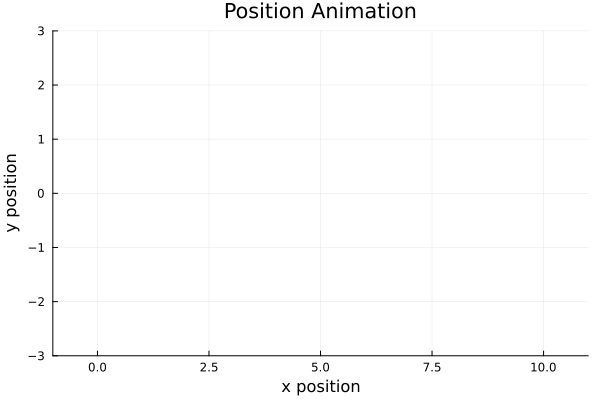

In [257]:
animation(robot_path, human_path, pos_xlims=[-1, 11])

┌ Info: Saved animation to /tmp/jl_UhwB8vABoV.gif
└ @ Plots /home/jasper/.julia/packages/Plots/3BCH5/src/animation.jl:156


Plots.AnimatedGif("/tmp/jl_UhwB8vABoV.gif")
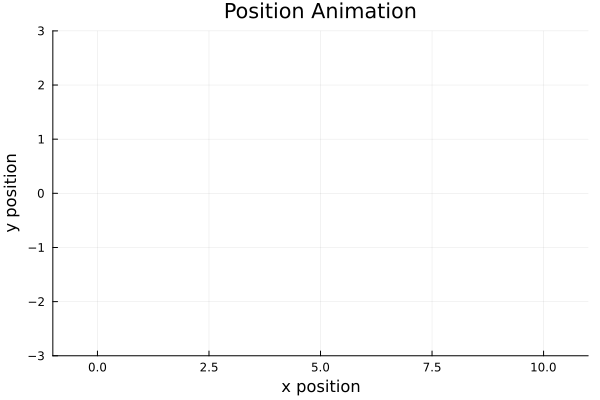

In [222]:
animation(robot_path, human_path, pos_xlims=[-1, 11])

In [189]:
sum(solve_times[1]) / 50

0.07004827976226807

In [183]:
findmax(solve_times[1] )

(0.2168440818786621, 6)

In [ ]:
plt = plot(robot_path[:,1], robot_path[:,2], xlims=[-1, 10], ylims=[-5, 5])
plot!(plt, human_path[:,1], human_path[:,2])

In [ ]:
animation(robot_path, human_path, pos_xlims=[-1, 11], pos_ylims=[-2.5, 2.5])

# Summary Plots

### Setup the planner

In [273]:
dt = 0.1
velocity_max = 1.5
# human = SingleIntegratorPolar2D(dt, velocity_max, [pi, 2.])
human = Unicycle(dt, velocity_max, [1., 1.5])

time_horizon = 50
# Q = zeros(Float64, human.state_dim, human.state_dim)
# R = diagm([0.; 0.1]) 
# Qt = diagm([10.; 10.])
Q = diagm([0.0; 0.0; 0.])
R = diagm([1.0; 0.0]) 
Qt = diagm([10.; 10.; 0.])
markup = 0.8
collision_slack = 150.
trust_region_weight = 5.
inconvenience_weights = [1.; 1.; 0.01]
collision_radius = 1.
inconvenience_ratio = 0.13


human_hps = PlannerHyperparameters(dynamics=human,
                             time_horizon=time_horizon,
                             Q=Q,
                             R=R,
                             Qt=Qt,
                             markup=markup,
                             collision_slack=collision_slack,
                             trust_region_weight=trust_region_weight,
                             inconvenience_weights=inconvenience_weights,
                             collision_radius=collision_radius,
                             inconvenience_ratio=inconvenience_ratio)



dt = 0.1
velocity_max = 1.5
# robot = Unicycle(dt, velocity_max, [1.0, 2.])
robot = DynamicallyExtendedUnicycle(dt, velocity_max, [1., 3.])

# time_horizon = 45
Q = diagm([0.0; 0.0; 0.; 0.])
R = diagm([1.; 1.]) 
Qt = diagm([10.; 10.; 0.; 0.])

robot_hps = PlannerHyperparameters(dynamics=robot,
                             time_horizon=time_horizon,
                             Q=Q,
                             R=R,
                             Qt=Qt,
                             markup=markup,
                             collision_slack=collision_slack,
                             trust_region_weight=trust_region_weight,
                             inconvenience_weights=inconvenience_weights,
                             collision_radius=collision_radius,
                             inconvenience_ratio=inconvenience_ratio)


PlannerHyperparameters{Float64}
  dynamics: DynamicallyExtendedUnicycle{Float64}
  time_horizon: Int64 50
  Q: Array{Float64}((4, 4)) [0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0]
  R: Array{Float64}((2, 2)) [1.0 0.0; 0.0 1.0]
  Qt: Array{Float64}((4, 4)) [10.0 0.0 0.0 0.0; 0.0 10.0 0.0 0.0; 0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0]
  markup: Float64 0.8
  collision_slack: Float64 150.0
  collision_markup: Float64 0.98
  trust_region_weight: Float64 5.0
  inconvenience_weights: Array{Float64}((3,)) [1.0, 1.0, 0.01]
  collision_radius: Float64 1.0
  inconvenience_ratio: Float64 0.13


In [274]:
robot_initial_state = [0.; 0.; 0.; 0.]
robot_goal_state = [10.; 0.; 0.; 0.]
human_initial_state = [10.; 0.; pi]
human_goal_state = [0.; 0.; pi]
solver = "ECOS"

ip = InteractionPlanner(robot_hps, 
                        human_hps,
                        robot_initial_state,
                        human_initial_state,
                        robot_goal_state,
                        human_goal_state,
                        solver)

InteractionPlanner
  ego_planner: AgentPlanner
  other_planner: AgentPlanner


In [275]:
incon_problem, xs, us = @time solve(ip.ego_planner.incon, iterations=10, verbose=false, keep_history=false)
incon_problem, xs, us = @time solve(ip.other_planner.incon, iterations=10, verbose=false, keep_history=false);

  0.176211 seconds (845.82 k allocations: 84.993 MiB)


  0.374044 seconds (783.50 k allocations: 77.817 MiB, 39.09% gc time)


In [276]:
@time saved_data_test, _, _, _, _ = ibr_save(ip, 5, "ego")

  0.343603 seconds (1.07 M allocations: 100.188 MiB)


(SaveData
  previous_ips: Array{InteractionPlanner}((5,))
, [[1.3459776179392955e-10 1.257109534544691e-10 2.6170210912229074e-11 1.9359486941828775e-10; 0.009274478322636287 7.506017805558418e-5 0.01217317228007821 0.18549633959393916; … ; 6.6202237547576175 0.5972258535600264 -0.19918742519495866 1.499999436224254; 6.769436290655337 0.5672773443444293 -0.1969055131370458 1.5425516313733616], [-1.1423108383420762e-10 -1.0025418261680016e-10 -3.6571243081283475e-11 -1.2824075350039718e-10; 0.009546041547190878 8.143491165370342e-5 0.012814079550999237 0.1909286322801688; … ; 6.6623059254989485 0.5296894943756628 -0.17366569832862852 1.4999997281904627; 6.812378860967919 0.5035332420310347 -0.1713954698116737 1.5457171124713065], [-5.563714088574034e-10 -4.415963971727415e-10 -1.2636985523444728e-10 -8.369403493513685e-10; 0.009790693776561294 8.536758599567151e-5 0.013085467256160195 0.1958222682281325; … ; 6.693786600672012 0.47136844573931685 -0.15069671952372465 1.4999990278129247; 

In [291]:
include("plotting.jl")

avoidance_animation (generic function with 1 method)

1.1306044457414741

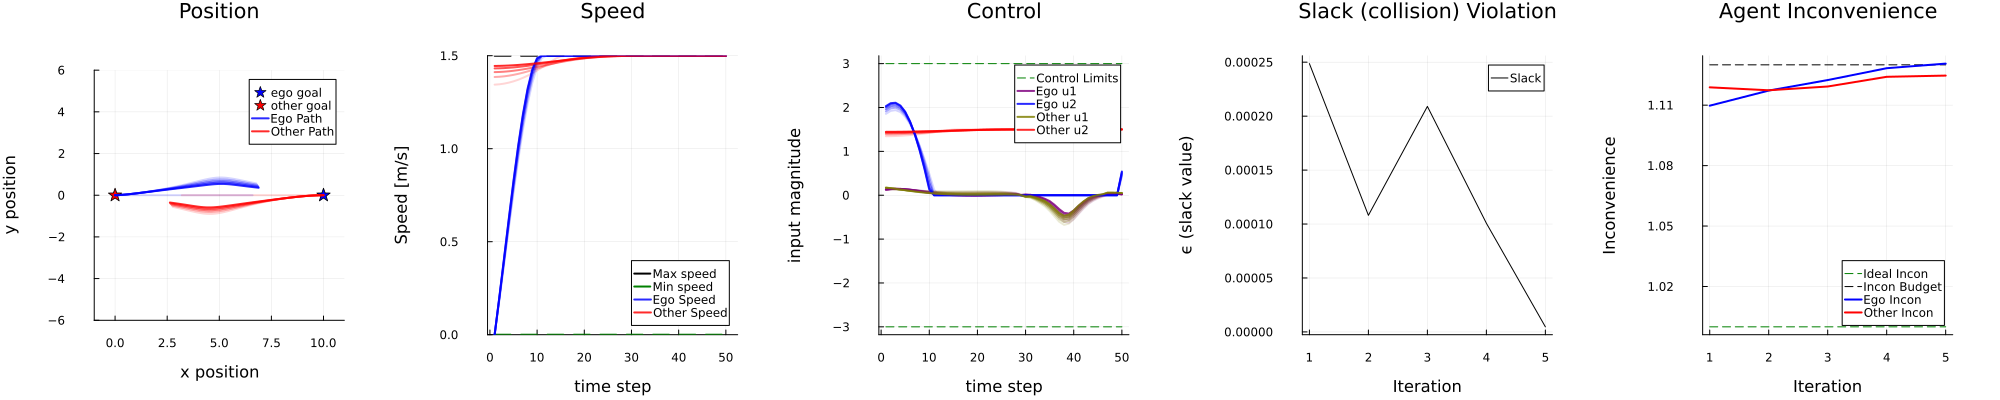

In [292]:
plot_example = plot_solve_solution(saved_data_test, scatter=false, show_speed=true, show_control=true)

AgentPlanner(IdealProblem(A JuMP Model
Minimization problem with:
Variables: 304
Objective function type: QuadExpr
`AffExpr`-in-`MathOptInterface.GreaterThan{Float64}`: 50 constraints
`AffExpr`-in-`MathOptInterface.LessThan{Float64}`: 50 constraints
`Vector{AffExpr}`-in-`MathOptInterface.Zeros`: 51 constraints
`Vector{AffExpr}`-in-`MathOptInterface.Nonpositives`: 100 constraints
Model mode: AUTOMATIC
CachingOptimizer state: ATTACHED_OPTIMIZER
Solver name: ECOS
Names registered in the model: control_constraints_lower_1, control_constraints_lower_10, control_constraints_lower_11, control_constraints_lower_12, control_constraints_lower_13, control_constraints_lower_14, control_constraints_lower_15, control_constraints_lower_16, control_constraints_lower_17, control_constraints_lower_18, control_constraints_lower_19, control_constraints_lower_2, control_constraints_lower_20, control_constraints_lower_21, control_constraints_lower_22, control_constraints_lower_23, control_constraints_lower_

In [263]:
function plot_solve_solution(problem::SaveData, second_problem::SaveData,show_theta::Bool; pos_xlims=[-1,11], pos_ylims=[-6, 6], scatter=true::Bool, show_speed=true::Bool, show_control=true::Bool)

    l = @layout [a b] 
    width=2000
    height=800
    alpha_plot = 0.7
    linewidth = 2
    markersize = 2
    markersize_large = 7
    ego_color = :blue
    other_color = :red

    global iterations = length(problem.previous_ips)

    alpha_ratio = 1 / (iterations + 1)
    N = problem.previous_ips[1].ego_planner.ideal.hps.time_horizon

    ego_goal_state = problem.previous_ips[1].ego_planner.ideal.opt_params.goal_state
    other_goal_state = problem.previous_ips[1].other_planner.ideal.opt_params.goal_state

    ego_dynamics = problem.previous_ips[1].ego_planner.ideal.hps.dynamics       # use first ip arbitrarily, any iteration will give the same values for these entries
    other_dynamics = problem.previous_ips[1].other_planner.ideal.hps.dynamics

    global ego_ctrl_dim = 2
    global other_ctrl_dim = 2

    # plotting position trajectory

    plot_traj = plot(size=(height, height), xlabel="x position", ylabel="y position", title="Position", margin=10mm, ylims=pos_ylims, xlims=pos_xlims, aspect_ratio=:equal)
    scatter!(ego_goal_state[1:1], ego_goal_state[2:2], marker=:star, markersize=markersize_large, color=ego_color, label="ego goal")
    scatter!(plot_traj, other_goal_state[1:1], other_goal_state[2:2], marker=:star, markersize=markersize_large, color=other_color, label="other goal")

    plot!(plot_traj, value.(problem.previous_ips[end].ego_planner.incon.model[:x])[:,1], value.(problem.previous_ips[end].ego_planner.incon.model[:x])[:,2], color=ego_color, linewidth=linewidth, label="Robot μ = 0.9", alpha=alpha_plot)

    plot!(plot_traj, value.(problem.previous_ips[end].other_planner.incon.model[:x])[:,1], value.(problem.previous_ips[end].other_planner.incon.model[:x])[:,2], color=other_color, linewidth=linewidth, label="Human μ = 0.9", alpha=alpha_plot)


    plot!(plot_traj, value.(second_problem.previous_ips[end].ego_planner.incon.model[:x])[:,1], value.(second_problem.previous_ips[end].ego_planner.incon.model[:x])[:,2], color=:purple, linewidth=linewidth, label="Robot μ = 1.1", alpha=alpha_plot)

    plot!(plot_traj, value.(second_problem.previous_ips[end].other_planner.incon.model[:x])[:,1], value.(second_problem.previous_ips[end].other_planner.incon.model[:x])[:,2], color=:green, linewidth=linewidth, label="Human μ = 1.1", alpha=alpha_plot)

    if scatter
        scatter!(plot_traj, value.(problem.previous_ips[end].ego_planner.ideal.model[:x])[:,1], value.(problem.previous_ips[end].ego_planner.ideal.model[:x])[:,2], color=ego_color, linewidth=linewidth, label="", alpha=alpha_plot)

        scatter!(plot_traj, value.(problem.previous_ips[end].other_planner.ideal.model[:x])[:,1], value.(problem.previous_ips[end].other_planner.ideal.model[:x])[:,2], color=other_color, linewidth=linewidth, label="", alpha=alpha_plot)

        scatter!(plot_traj, value.(second_problem.previous_ips[end].ego_planner.ideal.model[:x])[:,1], value.(second_problem.previous_ips[end].ego_planner.ideal.model[:x])[:,2], color=ego_color, linewidth=linewidth, label="", alpha=alpha_plot)

        scatter!(plot_traj, value.(second_problem.previous_ips[end].other_planner.ideal.model[:x])[:,1], value.(second_problem.previous_ips[end].other_planner.ideal.model[:x])[:,2], color=other_color, linewidth=linewidth, label="", alpha=alpha_plot)
    end
    # plotting speed/control

    # speed parameters
    max_speed = maximum([problem.previous_ips[1].ego_planner.ideal.hps.dynamics.velocity_max, problem.previous_ips[1].other_planner.ideal.hps.dynamics.velocity_max])
    ego_max_speed = problem.previous_ips[1].ego_planner.ideal.hps.dynamics.velocity_max
    other_max_speed = problem.previous_ips[1].other_planner.ideal.hps.dynamics.velocity_max

    # control parameters
    ego_ctrl_dim = problem.previous_ips[1].ego_planner.ideal.hps.dynamics.ctrl_dim
    other_ctrl_dim = problem.previous_ips[1].other_planner.ideal.hps.dynamics.ctrl_dim

    ego_max_ctrl = maximum(problem.previous_ips[1].ego_planner.ideal.hps.dynamics.control_max)
    ego_min_ctrl = minimum(problem.previous_ips[1].ego_planner.ideal.hps.dynamics.control_min)
    other_max_ctrl = maximum(problem.previous_ips[1].other_planner.ideal.hps.dynamics.control_max)
    other_min_ctrl = minimum(problem.previous_ips[1].other_planner.ideal.hps.dynamics.control_min)

    plot_theta = plot(size=(height, height), xlabel="time step", ylabel="abs(Theta)", title="Theta vs. time", margin=10mm, legend=:bottomright)
    plot_ctrl = plot(size=(height, height), xlabel="time step", ylabel="input magnitude", title="Control", margin=10mm)

    # angle plotting
    robot_xs_mu_09 = vector_of_vectors_to_matrix(problem.previous_ips[iterations].ego_planner.incon.opt_params.previous_states)
    human_xs_mu_09 = vector_of_vectors_to_matrix(problem.previous_ips[iterations].other_planner.incon.opt_params.previous_states)
    robot_xs_mu_11 = vector_of_vectors_to_matrix(second_problem.previous_ips[iterations].ego_planner.incon.opt_params.previous_states)
    human_xs_mu_11 = vector_of_vectors_to_matrix(second_problem.previous_ips[iterations].other_planner.incon.opt_params.previous_states)
    plot!(plot_theta, robot_xs_mu_09[:,3:3], linewidth=2, label="Robot μ = 0.9", color=ego_color)
    plot!(plot_theta, human_xs_mu_09[:,3:3], linewidth=2, label="Human μ = 0.9", color=other_color)
    plot!(plot_theta, robot_xs_mu_11[:,3:3], linewidth=2, label="Robot μ = 1.1", color=:magenta)
    plot!(plot_theta, human_xs_mu_11[:,3:3], linewidth=2, label="Human μ = 1.1", color=:green)

        # ctrl plotting
    plot!(plot_ctrl, 1:N, maximum([ego_max_ctrl, other_max_ctrl]) * ones(Float64, N), linestyle=:dash, linewith=linewidth,  color=:green, label="Control Limits")
    plot!(plot_ctrl, 1:N, minimum([ego_min_ctrl, other_min_ctrl]) * ones(Float64, N), linestyle=:dash, linewith=linewidth,  color=:green, label="")   
        # ego plot
    for j in 1:ego_ctrl_dim
        plot!(plot_ctrl, 1:N, vector_of_vectors_to_matrix(problem.previous_ips[iterations].ego_planner.incon.opt_params.previous_controls)[:, j], label="", color=RGB(1 - (1 / ego_ctrl_dim) * j, 0., (1 / ego_ctrl_dim) * j), linewidth=linewidth, alpha=(i * alpha_ratio))
        plot!(plot_ctrl, 1:N, vector_of_vectors_to_matrix(second_problem.previous_ips[iterations].ego_planner.incon.opt_params.previous_controls)[:, j], label="", color=RGB(1 - (1 / ego_ctrl_dim) * j, 0., (1 / ego_ctrl_dim) * j), linewidth=linewidth, alpha=(i * alpha_ratio))
    end 
        # other plot
    for k in 1:other_ctrl_dim
        plot!(plot_ctrl, 1:N, vector_of_vectors_to_matrix(problem.previous_ips[iterations].other_planner.incon.opt_params.previous_controls)[:, k], label="", color=RGB((1 / other_ctrl_dim) * k, 1 - (1 / other_ctrl_dim) * k, 0.), linewidth=linewidth, alpha=(i * alpha_ratio))
        plot!(plot_ctrl, 1:N, vector_of_vectors_to_matrix(second_problem.previous_ips[iterations].other_planner.incon.opt_params.previous_controls)[:, k], label="", color=RGB((1 / other_ctrl_dim) * k, 1 - (1 / other_ctrl_dim) * k, 0.), linewidth=linewidth, alpha=(i * alpha_ratio))
    end 


    slack_violation = Vector{Float64}(undef, iterations)

    for i in 1:iterations
        slack_violation[i] = value(problem.previous_ips[i].ego_planner.incon.model[:ϵ])
    end

    plot_slack_violation = plot(size=(height, height), xlabel="Iteration", ylabel="ϵ (slack value)", title="Slack (collision) Violation", margin=10mm)

    plot!(plot_slack_violation, 1:iterations, slack_violation, color=:black, label="Slack")

    # plotting inconvenience value over iterations

    incon_budget = problem.previous_ips[1].ego_planner.incon.hps.inconvenience_ratio
    inconvenience_ego = Vector{Float64}(undef, iterations)
    inconvenience_other = Vector{Float64}(undef, iterations)

    ideal_incon_ego = compute_convenience_value(ego_dynamics, matrix_to_vector_of_vectors(value.(problem.previous_ips[1].ego_planner.ideal.model[:x])), matrix_to_vector_of_vectors(value.(problem.previous_ips[1].ego_planner.ideal.model[:u])), ego_goal_state, problem.previous_ips[1].ego_planner.incon.hps.inconvenience_weights)

    ideal_incon_other = compute_convenience_value(other_dynamics, matrix_to_vector_of_vectors(value.(problem.previous_ips[1].other_planner.ideal.model[:x])), matrix_to_vector_of_vectors(value.(problem.previous_ips[1].other_planner.ideal.model[:u])), other_goal_state, problem.previous_ips[1].other_planner.incon.hps.inconvenience_weights)

    for i in 1:iterations
        inconvenience_ego[i] = compute_convenience_value(ego_dynamics, problem.previous_ips[i].ego_planner.incon.opt_params.previous_states, problem.previous_ips[i].ego_planner.incon.opt_params.previous_controls, ego_goal_state, problem.previous_ips[1].ego_planner.incon.hps.inconvenience_weights)
        
        inconvenience_other[i] = compute_convenience_value(other_dynamics, problem.previous_ips[i].other_planner.incon.opt_params.previous_states, problem.previous_ips[i].other_planner.incon.opt_params.previous_controls, other_goal_state, problem.previous_ips[1].other_planner.incon.hps.inconvenience_weights)
    end

    inconvenience_ego ./= ideal_incon_ego
    inconvenience_other ./= ideal_incon_other 

    plot_incon = plot(size=(height, height), xlabel="Iteration", ylabel="Inconvenience", title="Agent Inconvenience", margin=10mm)
    plot!(plot_incon, 1:iterations, ones(iterations), linestyle=:dash, linewith=linewidth, color=:green, label="Ideal Incon")
    plot!(plot_incon, 1:iterations, ones(iterations) .+ incon_budget, linestyle=:dash, linewith=linewidth, color=:black, label="Incon Budget")
    plot!(plot_incon, 1:iterations, inconvenience_ego, color=ego_color, linewidth=linewidth, label="Ego Incon")
    plot!(plot_incon, 1:iterations, inconvenience_other, color=other_color, linewidth=linewidth, label="Other Incon")

    plot(plot_traj, plot_theta, layout=l, size=(width, height))
end


plot_solve_solution (generic function with 8 methods)

# Sim Experimentation Utils

In [264]:
robot_params = PlannerParams(robot_ip.ego_planner.incon.hps, robot_ip.ego_planner.incon.opt_params, robot_ip.other_planner.incon.hps, robot_ip.other_planner.incon.opt_params)
human_params = PlannerParams(human_ip.ego_planner.incon.hps, human_ip.ego_planner.incon.opt_params, human_ip.other_planner.incon.hps, human_ip.other_planner.incon.opt_params)

PlannerParams(PlannerHyperparameters{Float64}
  dynamics: DynamicallyExtendedUnicycle{Float64}
  time_horizon: Int64 25
  Q: Array{Float64}((4, 4)) [0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0]
  R: Array{Float64}((2, 2)) [1.0 0.0; 0.0 0.3]
  Qt: Array{Float64}((4, 4)) [10.0 0.0 0.0 0.0; 0.0 10.0 0.0 0.0; 0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0]
  markup: Float64 1.05
  collision_slack: Float64 150.0
  collision_markup: Float64 0.98
  trust_region_weight: Float64 0.0
  inconvenience_weights: Array{Float64}((3,)) [1.0, 1.0, 0.1]
  collision_radius: Float64 1.0
  inconvenience_ratio: Float64 0.2
, PlannerOptimizerParams{Float64}
  As: Array{Matrix{Float64}}((25,))
  Bs: Array{Matrix{Float64}}((25,))
  Cs: Array{Vector{Float64}}((25,))
  Gs: Array{Vector{Float64}}((26,))
  Hs: Array{Float64}((26,)) [49.631133529186855, 49.73603900780577, 49.93659150886466, 50.33644574067624, 50.9415929709795, 51.75695485841216, 52.78824655394339, 54.042271165689876, 55.526985062021446, 57.

In [265]:
sim_params = IPSimParams(robot_params, human_params)

IPSimParams(PlannerParams(PlannerHyperparameters{Float64}
  dynamics: DynamicallyExtendedUnicycle{Float64}
  time_horizon: Int64 25
  Q: Array{Float64}((4, 4)) [0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0]
  R: Array{Float64}((2, 2)) [1.0 0.0; 0.0 0.0]
  Qt: Array{Float64}((4, 4)) [10.0 0.0 0.0 0.0; 0.0 10.0 0.0 0.0; 0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0]
  markup: Float64 1.05
  collision_slack: Float64 150.0
  collision_markup: Float64 0.98
  trust_region_weight: Float64 0.0
  inconvenience_weights: Array{Float64}((3,)) [1.0, 1.0, 0.1]
  collision_radius: Float64 1.0
  inconvenience_ratio: Float64 0.2
, PlannerOptimizerParams{Float64}
  As: Array{Matrix{Float64}}((25,))
  Bs: Array{Matrix{Float64}}((25,))
  Cs: Array{Vector{Float64}}((25,))
  Gs: Array{Vector{Float64}}((26,))
  Hs: Array{Float64}((26,)) [-51.63113352918629, -51.73614727601968, -51.93683780377234, -52.33673439680766, -52.941901408945675, -53.7572753160541, -54.78857492921602, -56.042603993993694, -57

In [266]:
# robot_xs, robot_us, human_xs, human_us, solve_times = simulate(robot_ip, human_ip, 50, ibr_iterations=2, leader="other")

In [267]:
sim_data = SimData(sim_params, solve_times, robot_path, robot_controls, human_path, human_controls)

SimData(IPSimParams(PlannerParams(PlannerHyperparameters{Float64}
  dynamics: DynamicallyExtendedUnicycle{Float64}
  time_horizon: Int64 25
  Q: Array{Float64}((4, 4)) [0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0]
  R: Array{Float64}((2, 2)) [1.0 0.0; 0.0 0.0]
  Qt: Array{Float64}((4, 4)) [10.0 0.0 0.0 0.0; 0.0 10.0 0.0 0.0; 0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0]
  markup: Float64 1.05
  collision_slack: Float64 150.0
  collision_markup: Float64 0.98
  trust_region_weight: Float64 0.0
  inconvenience_weights: Array{Float64}((3,)) [1.0, 1.0, 0.1]
  collision_radius: Float64 1.0
  inconvenience_ratio: Float64 0.2
, PlannerOptimizerParams{Float64}
  As: Array{Matrix{Float64}}((25,))
  Bs: Array{Matrix{Float64}}((25,))
  Cs: Array{Vector{Float64}}((25,))
  Gs: Array{Vector{Float64}}((26,))
  Hs: Array{Float64}((26,)) [-51.63113352918629, -51.73614727601968, -51.93683780377234, -52.33673439680766, -52.941901408945675, -53.7572753160541, -54.78857492921602, -56.042603993993

In [ ]:
plot_solve_solution(sim_data)

In [ ]:
sim_data.solve_times

# Experimentation Code

In [ ]:
# for experiment in experiments
#     set up problem. Assign hyperparameters. Cycle through hps for each experiment
#     (markup, collision slack, trust region weights, incon weights, collision radius, incon ratio)
#     for opt_param in opt_params
#         assign new opt_params to the problem.
#         (initial states, goal states)
#         register the InteractionPlanner
#         run simulation
#         store data into dictionary w/ with key=run_number
#         (store: hps, opt_params, and paths) -- enough data to recreate the problem and plot Base.load_path_setup_code
#         delete interaction planner before cycling through the loop.
#     end
# end

In [ ]:
using ProgressBars

In [38]:
# setting up the problem to be deep copied for experiments
# this is for experimentation where each agent correctly assumes the policy of the oteher agent

# setting up the robot planner
solver = "ECOS"

time_horizon = 25
dt = 0.1
velocity_max = 1.5

human = DynamicallyExtendedUnicycle(dt, velocity_max, [1., 1.5])

Q = diagm([0.0; 0.0; 0.; 0.])
R = diagm([1.; 1.]) 
Qt = diagm([10.; 10.; 0.; 0.])
markup = 1.05
collision_slack = 150.
trust_region_weight = 5.
inconvenience_weights = [1.; 1.; 0.1]
collision_radius = 1.
inconvenience_ratio = 0.2

human_hps = PlannerHyperparameters(dynamics=human,
                             time_horizon=time_horizon,
                             Q=Q,
                             R=R,
                             Qt=Qt,
                             markup=markup,
                             collision_slack=collision_slack,
                             trust_region_weight=trust_region_weight,
                             inconvenience_weights=inconvenience_weights,
                             collision_radius=collision_radius,
                             inconvenience_ratio=inconvenience_ratio)



dt = 0.1
velocity_max = 1.5

robot = DynamicallyExtendedUnicycle(dt, velocity_max, [1., 1.5])

Q = diagm([0.0; 0.0; 0.; 0.])
R = diagm([1.; 1.]) 
Qt = diagm([10.; 10.; 0.; 0.])

robot_hps = PlannerHyperparameters(dynamics=robot,
                             time_horizon=time_horizon,
                             Q=Q,
                             R=R,
                             Qt=Qt,
                             markup=markup,
                             collision_slack=collision_slack,
                             trust_region_weight=trust_region_weight,
                             inconvenience_weights=inconvenience_weights,
                             collision_radius=collision_radius,
                             inconvenience_ratio=inconvenience_ratio)

robot_initial_state = [0.; 0.; 0.; 0.]
robot_goal_state = [10.; 0.; 0.; 0.]
human_initial_state = [10.; 0.; pi; 0.]
human_goal_state = [0.; 0.; pi; 0.]

robot_ip = InteractionPlanner(robot_hps, 
                        human_hps,
                        robot_initial_state,
                        human_initial_state,
                        robot_goal_state,
                        human_goal_state,
                        solver)
                             
human_ip = InteractionPlanner(human_hps, 
                        robot_hps,
                        human_initial_state,
                        robot_initial_state,
                        human_goal_state,
                        robot_goal_state,
                        solver)

InteractionPlanner
  ego_planner: AgentPlanner
  other_planner: AgentPlanner


### Mohr's Circle-ish Implementation 

In [39]:
include("experiments.jl")

display_data (generic function with 1 method)

In [40]:
test_human = DynamicallyExtendedUnicycle(dt, velocity_max, [1., 1.5])

DynamicallyExtendedUnicycle{Float64}
  dt: Float64 0.1
  state_dim: Int64 4
  ctrl_dim: Int64 2
  velocity_min: Float64 0.0
  velocity_max: Float64 1.5
  control_min: Array{Float64}((2,)) [-1.0, -1.5]
  control_max: Array{Float64}((2,)) [1.0, 1.5]


In [41]:
robot_states = mohrs_circle_states(test_human, [0., 0., 0., 0.], [10., 0., 0., 0.], pi / 6);

In [42]:
human_states = [([10., 0., pi, 0.], [0., 0., pi, 0.])]

1-element Vector{Tuple{Vector{Float64}, Vector{Float64}}}:
 ([10.0, 0.0, 3.141592653589793, 0.0], [0.0, 0.0, 3.141592653589793, 0.0])

### Simulation Code

In [43]:
sim_test = simulation_sweep(robot_ip, human_ip, 50, robot_states, human_states)

0.0%┣                                               ┫ 0/12 [00:00<00:00, -0s/it]


8.3%┣███▋                                       ┫ 1/12 [00:12<Inf:Inf, InfGs/it]


16.7%┣███████▊                                      ┫ 2/12 [00:22<03:38, 22s/it]


25.0%┣███████████▌                                  ┫ 3/12 [00:31<02:22, 16s/it]


33.3%┣███████████████▍                              ┫ 4/12 [00:41<01:50, 14s/it]


41.7%┣███████████████████▏                          ┫ 5/12 [00:51<01:29, 13s/it]


50.0%┣███████████████████████                       ┫ 6/12 [01:00<01:12, 12s/it]


58.3%┣██████████████████████████▉                   ┫ 7/12 [01:10<00:58, 12s/it]


66.7%┣██████████████████████████████▊               ┫ 8/12 [01:20<00:46, 11s/it]


75.0%┣██████████████████████████████████▌           ┫ 9/12 [01:30<00:34, 11s/it]


83.3%┣█████████████████████████████████████▌       ┫ 10/12 [01:40<00:22, 11s/it]


91.7%┣█████████████████████████████████████████▎   ┫ 11/12 [01:50<00:11, 11s/it]


100.0%┣████████████████████████████████████████████┫ 12/12 [02:00<00:00, 11s/it]
100.0%┣████████████████████████████████████████████┫ 12/12 [02:00<00:00, 11s/it]


Dict{String, SimData} with 12 entries:
  "Run 4"  => SimData(IPSimParams(PlannerParams(PlannerHyperparameters{Float64}…
  "Run 10" => SimData(IPSimParams(PlannerParams(PlannerHyperparameters{Float64}…
  "Run 1"  => SimData(IPSimParams(PlannerParams(PlannerHyperparameters{Float64}…
  "Run 11" => SimData(IPSimParams(PlannerParams(PlannerHyperparameters{Float64}…
  "Run 6"  => SimData(IPSimParams(PlannerParams(PlannerHyperparameters{Float64}…
  "Run 12" => SimData(IPSimParams(PlannerParams(PlannerHyperparameters{Float64}…
  "Run 2"  => SimData(IPSimParams(PlannerParams(PlannerHyperparameters{Float64}…
  "Run 9"  => SimData(IPSimParams(PlannerParams(PlannerHyperparameters{Float64}…
  "Run 5"  => SimData(IPSimParams(PlannerParams(PlannerHyperparameters{Float64}…
  "Run 8"  => SimData(IPSimParams(PlannerParams(PlannerHyperparameters{Float64}…
  "Run 7"  => SimData(IPSimParams(PlannerParams(PlannerHyperparameters{Float64}…
  "Run 3"  => SimData(IPSimParams(PlannerParams(PlannerHyperparameters

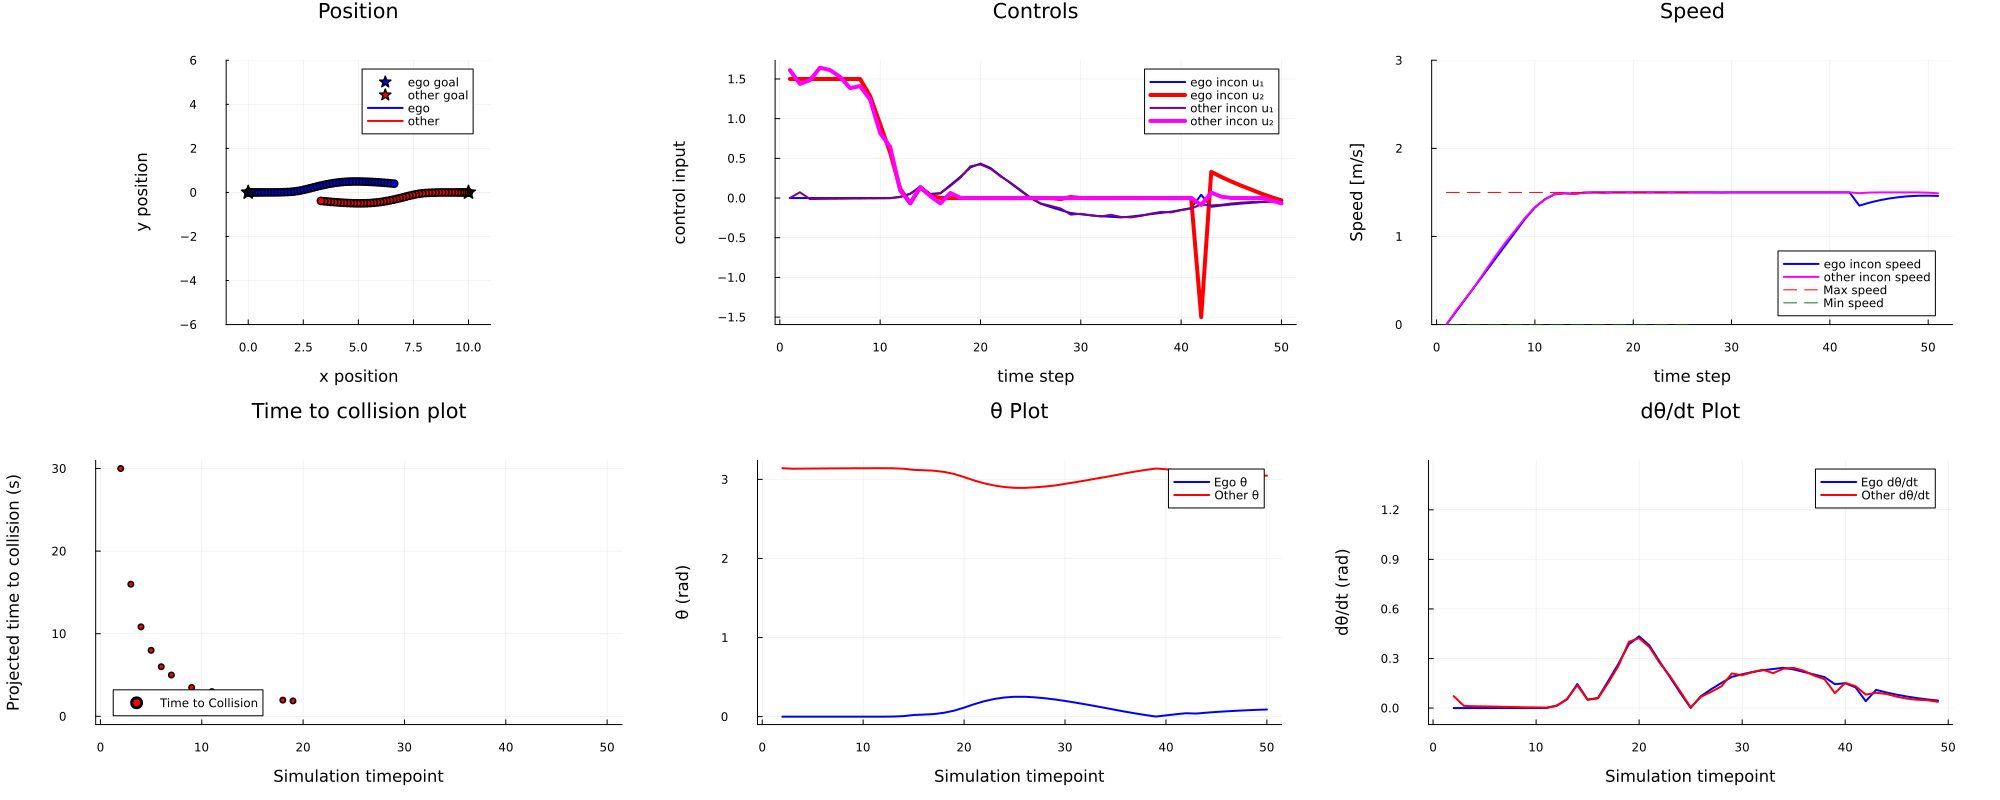

In [44]:
combine_sim_data_plots(sim_test["Run 1"])

In [45]:
compute_path_irregularity_index(sim_test["Run 1"])

Dict{String, Float64} with 2 entries:
  "ego PI"   => 4.92114
  "other PI" => 4.86831

# Data Metrics

In [ ]:
compute_average_control_effort(sim_data)

In [ ]:
compute_average_acceleration_per_segment(sim_data)

In [ ]:
compute_path_efficiency(sim_data)

In [ ]:
compute_path_irregularity_index(sim_data)

In [ ]:
compute_minimum_distance(sim_data)

In [ ]:
ttc = compute_time_to_collision(sim_data)
# ttc["Time to collision"]
# plot(1:50, ttc["Time to collision"])

In [ ]:
compute_dθ_dt(sim_data)

In [ ]:
compute_θ(sim_data)

In [ ]:
compute_time(sim_data)

In [ ]:
test_data_sweep_metrics = evaluate_sim(sim_test)

In [ ]:
test_data_sweep_metrics["Run 5"].plots["Combined Plot"]

In [ ]:
display_data(test_data_sweep_metrics)

# Experimental Setup

In [ ]:
using Serialization

In [ ]:
run_experiment(robot_ip, test_human_ip, 50, circular_experiment_states, [([10.; 0.; pi; 0.], [0.; 0.; pi; 0.])], "experimental_setup/metrics_test.dat")

In [27]:
using Serialization

In [28]:
proactiveHRI_robot_cooperative_human = deserialize("../experimental_results/ProactiveHRI_robot_cooperative_human.dat")
proactiveHRI_robot_less_cooperative_human = deserialize("../experimental_results/ProactiveHRI_robot_less-cooperative_human.dat")
proactiveHRI_robot_unaware_human = deserialize("../experimental_results/ProactiveHRI_robot_unaware_human.dat")
proactiveHRI_robot_aware_human = deserialize("../experimental_results/ProactiveHRI_robot_overly_aware__human.dat")
proactiveHRI_robot_cooperative_human_head_on = deserialize("../experimental_results/ProactiveHRI_robot_cooperative_human_head_on")
proactiveHRI_robot_less_cooperative_human_head_on = deserialize("../experimental_results/ProactiveHRI_robot_less-cooperative_human_head_on.dat")
proactiveHRI_robot_unaware_human_head_on = deserialize("../experimental_results/ProactiveHRI_robot_unaware_human_head_on.dat")
proactiveHRI_robot_overly_aware_human_head_on = deserialize("../experimental_results/ProactiveHRI_robot_overly_aware_human_head_on.dat")
SFM_robot_cooperative_human = deserialize("../experimental_results/SFM_robot_cooperative_human.dat")
SFM_robot_less_cooperative_human = deserialize("../experimental_results/SFM_robot_less-cooperative_human.dat")
SFM_robot_unaware_human = deserialize("../experimental_results/SFM_robot_unaware_human.dat")
SFM_robot_aware_human = deserialize("../experimental_results/SFM_robot_aware_human.dat")
SFM_robot_cooperative_human_head_on = deserialize("../experimental_results/SFM_robot_cooperative_human_head_on.dat")



Dict{String, SimMetrics} with 199 entries:
  "Run 151" => SimMetrics(Dict("Ego Avg Control Effort"=>0.38239, "Other Avg Co…
  "Run 140" => SimMetrics(Dict("Ego Avg Control Effort"=>0.382144, "Other Avg C…
  "Run 20"  => SimMetrics(Dict("Ego Avg Control Effort"=>0.386635, "Other Avg C…
  "Run 35"  => SimMetrics(Dict("Ego Avg Control Effort"=>0.392344, "Other Avg C…
  "Run 192" => SimMetrics(Dict("Ego Avg Control Effort"=>0.383658, "Other Avg C…
  "Run 127" => SimMetrics(Dict("Ego Avg Control Effort"=>0.381082, "Other Avg C…
  "Run 137" => SimMetrics(Dict("Ego Avg Control Effort"=>0.380766, "Other Avg C…
  "Run 181" => SimMetrics(Dict("Ego Avg Control Effort"=>0.382686, "Other Avg C…
  "Run 15"  => SimMetrics(Dict("Ego Avg Control Effort"=>0.387349, "Other Avg C…
  "Run 60"  => SimMetrics(Dict("Ego Avg Control Effort"=>0.382984, "Other Avg C…
  "Run 150" => SimMetrics(Dict("Ego Avg Control Effort"=>0.382637, "Other Avg C…
  "Run 99"  => SimMetrics(Dict("Ego Avg Control Effort"=>0.386684,

In [29]:
display_data(SFM_robot_cooperative_human_head_on)

GtkLabelLeaf(name="", parent, width-request=-1, height-request=-1, visible=TRUE, sensitive=TRUE, app-paintable=FALSE, can-focus=FALSE, has-focus=FALSE, is-focus=FALSE, focus-on-click=TRUE, can-default=FALSE, has-default=FALSE, receives-default=FALSE, composite-child=FALSE, style, events=0, no-show-all=FALSE, has-tooltip=FALSE, tooltip-markup=NULL, tooltip-text=NULL, window, opacity=1.000000, double-buffered, halign=GTK_ALIGN_FILL, valign=GTK_ALIGN_FILL, margin-left, margin-right, margin-start=0, margin-end=0, margin-top=0, margin-bottom=100, margin=100, hexpand=FALSE, vexpand=FALSE, hexpand-set=FALSE, vexpand-set=TRUE, expand=FALSE, scale-factor=1, xpad, ypad, label="<b><u>Sim 199 Metrics</u></b>
<b> </b> 
<b>Ego Average Acceleration = </b>0.3372
<b>Other Average Acceleration = </b>0.3
<b>-</b><b>-</b><b>-</b><b>-</b><b>-</b><b>-</b><b>-</b><b>-</b><b>-</b><b>-</b><b>-</b><b>-</b><b>-</b><b>-</b><b>-</b><b>-</b><b>-</b><b>-</b><b>-</b><b>-</b><b>-</b><b>-</b><b>-</b><b>-</b><b>-</b><b>

In [295]:
display_data(SFM_robot_cooperative_human_head_on)

GtkLabelLeaf(name="", parent, width-request=-1, height-request=-1, visible=TRUE, sensitive=TRUE, app-paintable=FALSE, can-focus=FALSE, has-focus=FALSE, is-focus=FALSE, focus-on-click=TRUE, can-default=FALSE, has-default=FALSE, receives-default=FALSE, composite-child=FALSE, style, events=0, no-show-all=FALSE, has-tooltip=FALSE, tooltip-markup=NULL, tooltip-text=NULL, window, opacity=1.000000, double-buffered, halign=GTK_ALIGN_FILL, valign=GTK_ALIGN_FILL, margin-left, margin-right, margin-start=0, margin-end=0, margin-top=0, margin-bottom=100, margin=100, hexpand=FALSE, vexpand=FALSE, hexpand-set=FALSE, vexpand-set=TRUE, expand=FALSE, scale-factor=1, xpad, ypad, label="<b><u>Sim 199 Metrics</u></b>
<b> </b> 
<b>Ego Average Acceleration = </b>0.3372
<b>Other Average Acceleration = </b>0.3
<b>-</b><b>-</b><b>-</b><b>-</b><b>-</b><b>-</b><b>-</b><b>-</b><b>-</b><b>-</b><b>-</b><b>-</b><b>-</b><b>-</b><b>-</b><b>-</b><b>-</b><b>-</b><b>-</b><b>-</b><b>-</b><b>-</b><b>-</b><b>-</b><b>-</b><b>

# Social Forces Sim w/ Dynamically Extended Unicycle Model

In [4]:
# setting up the human planner to be used for experiments (cooperative human)
solver = "ECOS"
dt = 0.1
velocity_max = 1.5
human = DynamicallyExtendedUnicycle(dt, velocity_max, [1., 1.5])

time_horizon = 25
Q = diagm([0.0; 0.0; 0.; 0.])
R = diagm([1.; 0.3]) 
Qt = diagm([10.; 10.; 0.; 0.])
markup = 1.05
collision_slack = 150.
trust_region_weight = 5.
inconvenience_weights = [1.; 1.; 0.1]
collision_radius = 1.
inconvenience_ratio = 0.2


human_hps = PlannerHyperparameters(dynamics=human,
                             time_horizon=time_horizon,
                             Q=Q,
                             R=R,
                             Qt=Qt,
                             markup=markup,
                             collision_slack=collision_slack,
                             trust_region_weight=trust_region_weight,
                             inconvenience_weights=inconvenience_weights,
                             collision_radius=collision_radius,
                             inconvenience_ratio=inconvenience_ratio)



dt = 0.1
velocity_max = 1.5
# robot = Unicycle(dt, velocity_max, [1.0, 2.])
robot = DynamicallyExtendedUnicycle(dt, velocity_max, [1., 1.5])

# time_horizon = 45
Q = diagm([0.0; 0.0; 0.; 0.])
R = diagm([1.; 0.0]) 
Qt = diagm([10.; 10.; 0.; 0.])

robot_hps = PlannerHyperparameters(dynamics=robot,
                             time_horizon=time_horizon,
                             Q=Q,
                             R=R,
                             Qt=Qt,
                             markup=markup,
                             collision_slack=collision_slack,
                             trust_region_weight=trust_region_weight,
                             inconvenience_weights=inconvenience_weights,
                             collision_radius=collision_radius,
                             inconvenience_ratio=inconvenience_ratio)

robot_initial_state = [0.; 0.; 0.; 0.]
robot_goal_state = [10.; 0.; 0.; 0.]
human_initial_state = [10.; 0.; pi; 0.]
human_goal_state = [0.; 0.; pi; 0.]
# setting up the IP object to be serialized and saved for all trials
human_ip = InteractionPlanner(human_hps, 
                        robot_hps,
                        human_initial_state,
                        robot_initial_state,
                        human_goal_state,
                        robot_goal_state,
                        solver)

# saving object
# serialize("../experimental_setup/cooperative_human_ip.dat", human_ip)

InteractionPlanner
  ego_planner: AgentPlanner
  other_planner: AgentPlanner


In [ ]:
robot = DynamicallyExtendedUnicycle(dt, 2., [1., 2.])

In [ ]:
metrics = run_experiment(robot, human_ip, 50, circular_states, [([10.; 0.; pi; 0.], [0.; 0.; pi; 0.])], p=1., q=2., τ=2., ψ=pi/6, c=0.3)

# HJ Reachability Experimentation Code

In [10]:
using Interpolations
using MAT
include("velocity_obstacles.jl")

reactive_velocity_obstacles (generic function with 1 method)

In [5]:
function simulation_sweep(ego_hps::PlannerHyperparameters, other_ip::InteractionPlanner, sim_horizon, ego_boundary_conditions::Vector{Tuple{Vector{Float64}, Vector{Float64}}}, other_boundary_conditions::Vector{Tuple{Vector{Float64}, Vector{Float64}}}; p=2., q=2., τ=2., ψ=pi/6, c=0.3)
    runs = maximum([length(ego_boundary_conditions), length(other_boundary_conditions)])

    ego_ego_hps = other_ip.other_planner.incon.hps
    ego_other_hps = other_ip.ego_planner.incon.hps
    other_ego_hps = other_ip.ego_planner.incon.hps
    other_other_hps = other_ip.other_planner.incon.hps

    # global HJIdata = matread("../hj_cache/DynamicallyExtendedUnicycle_VO_40_40_10_12_12.mat")
    global HJIdata = matread("../hj_cache/DynamicallyExtendedUnicycle_VO_50_50_10_20_20.mat")

    global V_mat = HJIdata["V"]
    global V_mat = [V_mat;;;V_mat[:,:,1:1,:,:]]
    global grid_knots = tuple((x -> convert(Vector{Float32}, vec(x))).(HJIdata["grid_knots"])...)
    push!(grid_knots[3], -grid_knots[3][1])
    global V = interpolate(Float32, Float32, grid_knots, V_mat, Gridded(Linear()));

    if length(ego_boundary_conditions) == 1 
        for i in 1:(runs - 1)
            push!(ego_boundary_conditions, ego_boundary_conditions[1])
        end
    elseif length(other_boundary_conditions) == 1
        for i in 1:(runs - 1)
            push!(other_boundary_conditions, other_boundary_conditions[1])
        end
    end

    if length(ego_boundary_conditions) != length(other_boundary_conditions)
        throw(ArgumentError("length of 'ego_boundary_conditions' and 'other_boundary_conditions' must match"))
    end

    runs_dict = Dict{String, SimData}()

    for j in ProgressBar(1:runs)
        sim_other_ip = InteractionPlanner(other_ego_hps, other_other_hps, other_boundary_conditions[j][1], ego_boundary_conditions[j][1], other_boundary_conditions[j][2], ego_boundary_conditions[j][2], "ECOS")

        ego_params = PlannerParams(sim_other_ip.other_planner.incon.hps, sim_other_ip.other_planner.incon.opt_params, sim_other_ip.ego_planner.incon.hps, sim_other_ip.ego_planner.incon.opt_params)
        other_params = PlannerParams(sim_other_ip.ego_planner.incon.hps, sim_other_ip.ego_planner.incon.opt_params, sim_other_ip.other_planner.incon.hps, sim_other_ip.other_planner.incon.opt_params)

        sim_params = IPSimParams(ego_params, other_params)

        ego_states, ego_controls, other_states, other_controls = simulate_hj(ego_hps, sim_other_ip, ego_boundary_conditions[j][1], ego_boundary_conditions[j][2], sim_horizon)

        sim_data = SimData(sim_params, ([0.], nothing), ego_states, ego_controls, other_states, other_controls)

        runs_dict["Run $(j)"] = sim_data

        # deleting variables
        sim_ego_ip = nothing
        sim_other_ip = nothing
        ego_params = nothing
        other_params = nothing
        sim_params = nothing
        ego_states = nothing
        ego_controls = nothing
        other_states = nothing
        other_controls = nothing
        sim_data = nothing
    end

    runs_dict
end

simulation_sweep (generic function with 3 methods)

In [11]:
test_robot = DynamicallyExtendedUnicycle(0.1, 2., [1., 0.5])
test_robot_hps = PlannerHyperparameters(test_robot)
robot_states = mohrs_circle_states(test_robot, [0., 0., 0., 0.], [10., 0., 0., 0.], pi / 6);

In [12]:
hj_sim_sweep_test = simulation_sweep(test_robot_hps, human_ip, 50, robot_states, [([10.; 0.; pi; 0.], [0.; 0.; pi; 0.])])

0.0%┣                                               ┫ 0/12 [00:00<00:00, -0s/it]


8.3%┣███▋                                       ┫ 1/12 [00:10<Inf:Inf, InfGs/it]


16.7%┣███████▊                                      ┫ 2/12 [00:16<02:40, 16s/it]


25.0%┣███████████▌                                  ┫ 3/12 [00:22<01:41, 11s/it]


33.3%┣███████████████▍                              ┫ 4/12 [00:29<01:17, 10s/it]


41.7%┣███████████████████▋                           ┫ 5/12 [00:35<01:02, 9s/it]


50.0%┣███████████████████████▌                       ┫ 6/12 [00:42<00:50, 8s/it]


58.3%┣███████████████████████████▍                   ┫ 7/12 [00:48<00:40, 8s/it]


66.7%┣███████████████████████████████▍               ┫ 8/12 [00:55<00:31, 8s/it]


75.0%┣███████████████████████████████████▎           ┫ 9/12 [01:01<00:23, 8s/it]


83.3%┣██████████████████████████████████████▍       ┫ 10/12 [01:08<00:15, 8s/it]


91.7%┣██████████████████████████████████████████▏   ┫ 11/12 [01:15<00:07, 7s/it]


100.0%┣█████████████████████████████████████████████┫ 12/12 [01:21<00:00, 7s/it]
100.0%┣█████████████████████████████████████████████┫ 12/12 [01:21<00:00, 7s/it]


Dict{String, SimData} with 12 entries:
  "Run 4"  => SimData(IPSimParams(PlannerParams(PlannerHyperparameters{Float64}…
  "Run 10" => SimData(IPSimParams(PlannerParams(PlannerHyperparameters{Float64}…
  "Run 1"  => SimData(IPSimParams(PlannerParams(PlannerHyperparameters{Float64}…
  "Run 11" => SimData(IPSimParams(PlannerParams(PlannerHyperparameters{Float64}…
  "Run 6"  => SimData(IPSimParams(PlannerParams(PlannerHyperparameters{Float64}…
  "Run 12" => SimData(IPSimParams(PlannerParams(PlannerHyperparameters{Float64}…
  "Run 2"  => SimData(IPSimParams(PlannerParams(PlannerHyperparameters{Float64}…
  "Run 9"  => SimData(IPSimParams(PlannerParams(PlannerHyperparameters{Float64}…
  "Run 5"  => SimData(IPSimParams(PlannerParams(PlannerHyperparameters{Float64}…
  "Run 8"  => SimData(IPSimParams(PlannerParams(PlannerHyperparameters{Float64}…
  "Run 7"  => SimData(IPSimParams(PlannerParams(PlannerHyperparameters{Float64}…
  "Run 3"  => SimData(IPSimParams(PlannerParams(PlannerHyperparameters

In [25]:
test_metrics = evaluate_sim(hj_sim_sweep_test)

0.0%┣                                               ┫ 0/12 [00:00<00:00, -0s/it]


5151

8.3%┣███▋                                       ┫ 1/12 [00:00<Inf:Inf, InfGs/it]


5151

16.7%┣███████▉                                       ┫ 2/12 [00:01<00:05, 2it/s]


5151

25.0%┣███████████▊                                   ┫ 3/12 [00:01<00:03, 3it/s]


5151

33.3%┣███████████████▊                               ┫ 4/12 [00:01<00:02, 4it/s]


5151

41.7%┣███████████████████▋                           ┫ 5/12 [00:01<00:02, 4it/s]


5151

50.0%┣███████████████████████▌                       ┫ 6/12 [00:01<00:01, 5it/s]


5151

58.3%┣███████████████████████████▍                   ┫ 7/12 [00:01<00:01, 5it/s]


5151

66.7%┣███████████████████████████████▍               ┫ 8/12 [00:01<00:01, 5it/s]


5151

75.0%┣███████████████████████████████████▎           ┫ 9/12 [00:01<00:01, 6it/s]


5151

83.3%┣██████████████████████████████████████▍       ┫ 10/12 [00:02<00:00, 6it/s]


5151

91.7%┣██████████████████████████████████████████▏   ┫ 11/12 [00:02<00:00, 6it/s]


5151

100.0%┣█████████████████████████████████████████████┫ 12/12 [00:02<00:00, 6it/s]
100.0%┣█████████████████████████████████████████████┫ 12/12 [00:02<00:00, 6it/s]


Dict{String, SimMetrics} with 12 entries:
  "Run 4"  => SimMetrics(Dict("Ego Avg Control Effort"=>0.504714, "Other Avg Co…
  "Run 10" => SimMetrics(Dict("Ego Avg Control Effort"=>0.443351, "Other Avg Co…
  "Run 1"  => SimMetrics(Dict("Ego Avg Control Effort"=>0.199153, "Other Avg Co…
  "Run 11" => SimMetrics(Dict("Ego Avg Control Effort"=>0.393168, "Other Avg Co…
  "Run 6"  => SimMetrics(Dict("Ego Avg Control Effort"=>0.496833, "Other Avg Co…
  "Run 12" => SimMetrics(Dict("Ego Avg Control Effort"=>0.199141, "Other Avg Co…
  "Run 2"  => SimMetrics(Dict("Ego Avg Control Effort"=>0.397958, "Other Avg Co…
  "Run 9"  => SimMetrics(Dict("Ego Avg Control Effort"=>0.474636, "Other Avg Co…
  "Run 5"  => SimMetrics(Dict("Ego Avg Control Effort"=>0.481569, "Other Avg Co…
  "Run 8"  => SimMetrics(Dict("Ego Avg Control Effort"=>0.480506, "Other Avg Co…
  "Run 7"  => SimMetrics(Dict("Ego Avg Control Effort"=>0.385001, "Other Avg Co…
  "Run 3"  => SimMetrics(Dict("Ego Avg Control Effort"=>0.470906, "

In [26]:
display_data(test_metrics)

GtkLabelLeaf(name="", parent, width-request=-1, height-request=-1, visible=TRUE, sensitive=TRUE, app-paintable=FALSE, can-focus=FALSE, has-focus=FALSE, is-focus=FALSE, focus-on-click=TRUE, can-default=FALSE, has-default=FALSE, receives-default=FALSE, composite-child=FALSE, style, events=0, no-show-all=FALSE, has-tooltip=FALSE, tooltip-markup=NULL, tooltip-text=NULL, window, opacity=1.000000, double-buffered, halign=GTK_ALIGN_FILL, valign=GTK_ALIGN_FILL, margin-left, margin-right, margin-start=0, margin-end=0, margin-top=0, margin-bottom=100, margin=100, hexpand=FALSE, vexpand=FALSE, hexpand-set=FALSE, vexpand-set=TRUE, expand=FALSE, scale-factor=1, xpad, ypad, label="<b><u>Sim 12 Metrics</u></b>
<b> </b> 
<b>Ego Average Acceleration = </b>0.06231
<b>Other Average Acceleration = </b>0.2921
<b>-</b><b>-</b><b>-</b><b>-</b><b>-</b><b>-</b><b>-</b><b>-</b><b>-</b><b>-</b><b>-</b><b>-</b><b>-</b><b>-</b><b>-</b><b>-</b><b>-</b><b>-</b><b>-</b><b>-</b><b>-</b><b>-</b><b>-</b><b>-</b><b>-</b>

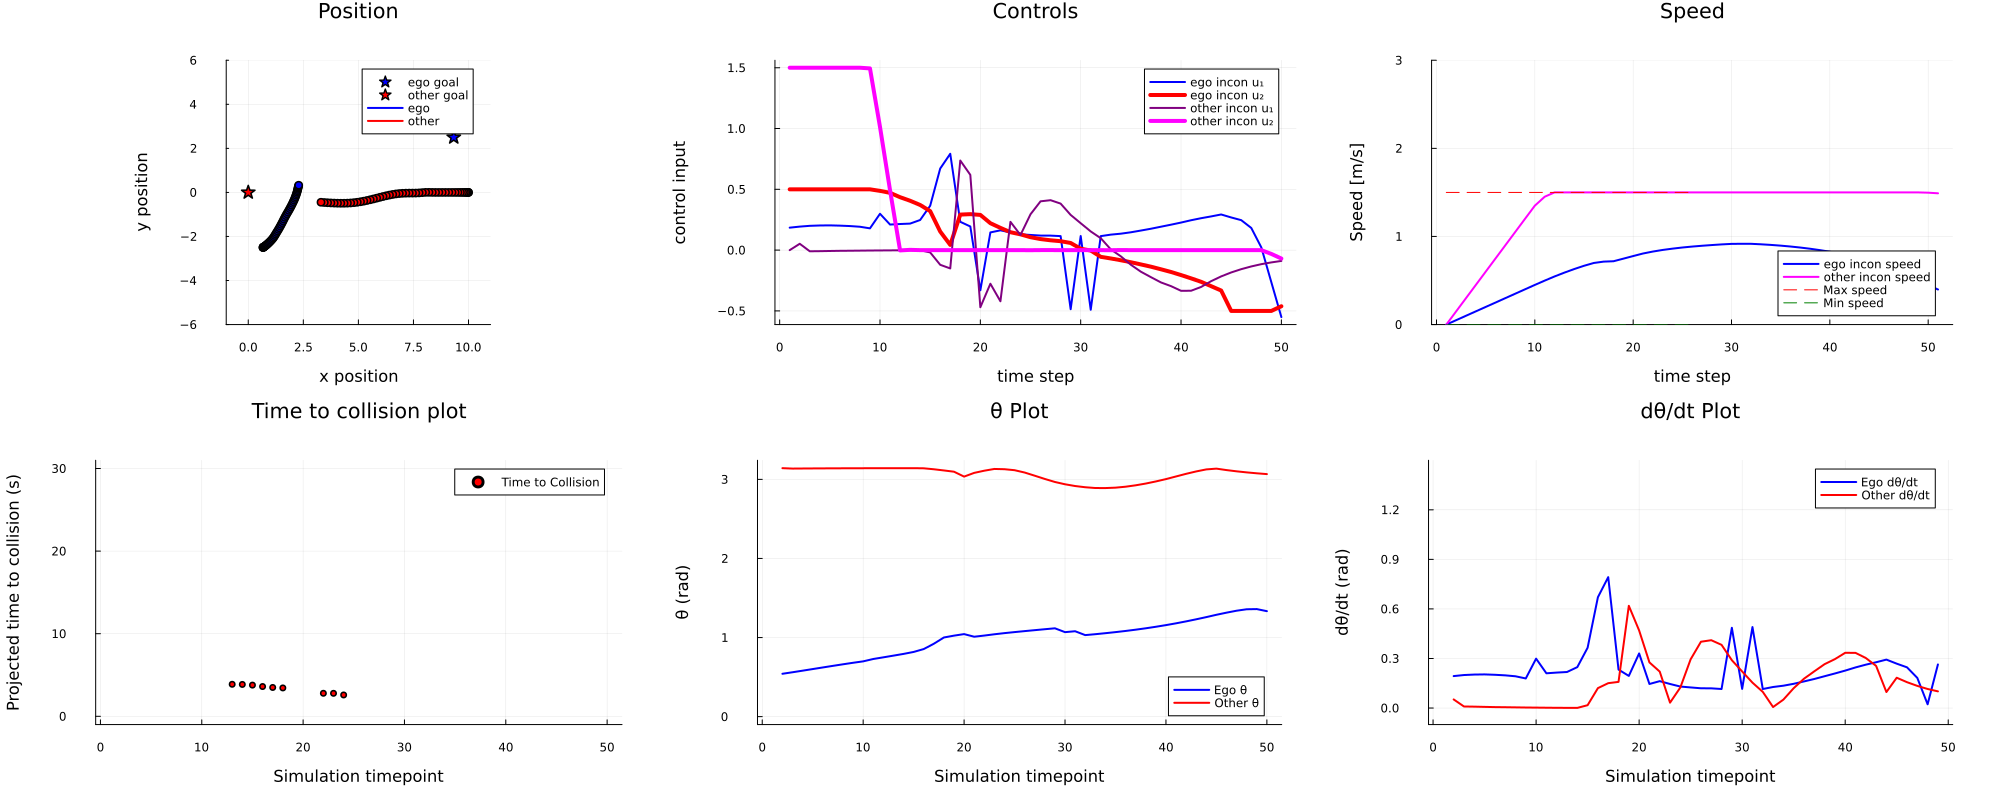

In [13]:
combine_sim_data_plots(hj_sim_sweep_test["Run 2"])

In [14]:
compute_path_irregularity_index(hj_sim_sweep_test["Run 2"])

Dict{String, Float64} with 2 entries:
  "ego PI"   => 26.7957
  "other PI" => 4.93859